##### Inlamning 2
###### 

##### Overview
Abstract / Introduction / Focus
Dataset
Model choice & Analysis
Feature / Target
Experiments  
Results analysis  
Summary / Conclusions



#### Model choice and analysis
My model of choice was first a small feed forward neural network implemented pytorch with two hidden layers of two neurons each.
Later I implemented a model in keras, tensorflow with four hidden layers of 2 neurons each to simply tensorboard usage.

#### Dataset

##### Pre-processing
My thinking for how to process this dataset is to one hot encode or binary encode all features. All features are categorical. Except 'qty'. It can be argued that 'qty' has a numerical relationship. In truth it has. I didn't reflect on that during the experiments. Using my "domain knowledge" of this dataset I argue that this general fact contains no additional information useful for predicting 'amount'. But not one-hot encoding 'qty' is another possible experiment to run!

##### Focus
I chose to make a Feed Forward Neural Network model. I don't think it's the best / optimal choice. But because the focus of the assignment is a deep analysis of the model results, it's a perfect opportunity to have some fun!
I spent a lot of time trying to implement tensorboard logging in a Pytorch model. Pytorch supports GPU usage natively in Windows so it was my initial choice, but it proved tricky. I changed to tensorflow and deepend(added layers to) the model in the end, and it was a lot easier to get some good looking tensorboard data this way! 

#### Experiments in short
##### EXP1 - "Yolo Modelling With Data Processing"
Wanted to get a feel for the data. I Kept all features with less than 91 unique values except 'qty' and one hot encoded them. 179 one-hot features. Trained a ffnn. Stopped improving at R2 of 0.45
###### Short complete description
Load the dataset from csv file. Check for null values. Drop 'promotion-ids', 'fulfilled-by', 'Unnamed: 22' columns. Check columns types. Fill in missing 'Courier Status' with "Unknown". Fill missing 'Amount' with mean. Explore connection between 'Category', 'Size', 'Qty' in relation to 'Amount' 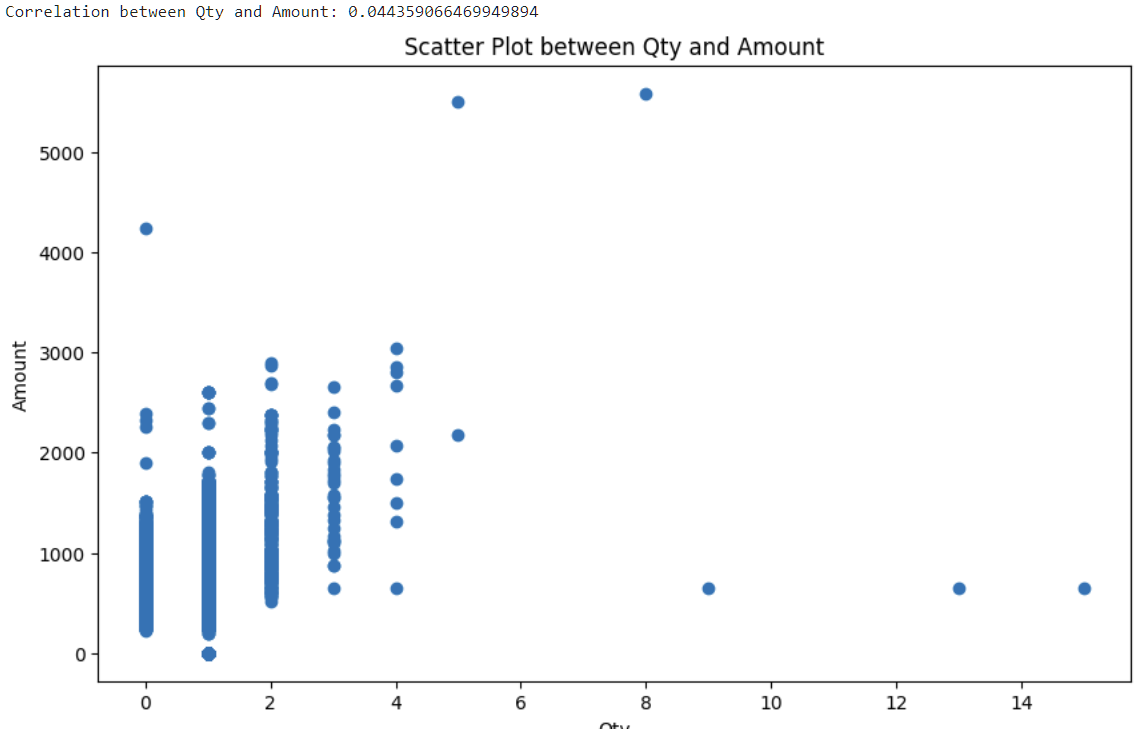. Explore number of unique values in each column. Count null value in columns. Drop columns with more than 92 unique values or just one and 'qty' because the weird spread of amount by qty. Delete rows with missing values. Correct spelling errors in 'ship-state'. One hot encode all columns with less than 92 unique values except target column 'Amount'. Example 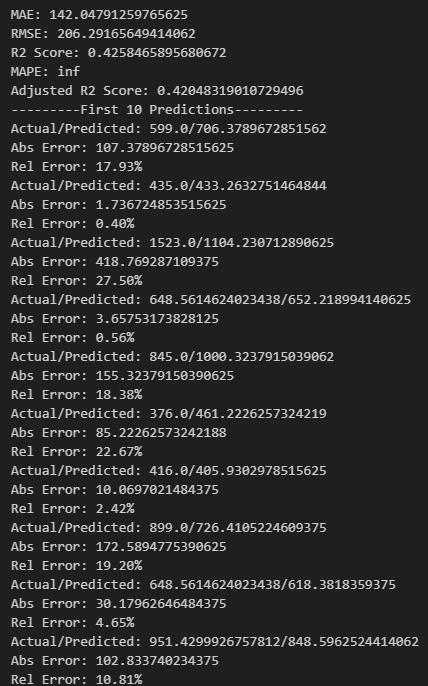.
##### EXP2 - "Yolo-Search"
Calculated correlation between features and 'amount' and started removing features that are close to 0 in correlation. Tried training the same ffnn on 120 and 68 features leaving those with stronger positive or negative correlations. 
120 features leaving only those features with a stronger correlation than |0.005|, R2: ~0.32  
68 features left, |0.01|,  R2: ~0.36  
##### EXP3 - Data Exploring and Processing
I was initially exploring the value of all feature columns for the target prediction. This was the focus of this experiment. Made everything lower case. Dropped rows with missing values for 'amount'. Dropped 'ship-state' values with less than 4 entries after correcting state names in column.  
Noticed the high cardinality and imbalanced distribution of count on the values in both 'ship-state' and 'ship-city' I have some thoughts about if something can be done here that helps the model, like binning low count cities so the tail of cities is not so very very long. 
Another though is that maybe dropping the one-hot columns XS, 6xl, 4xl, 5xl, free, ethnic dress, bottom, aree, blouse, dupatta, all qty except 1 would help the model. While still keeping in scope only using the columns we were urged to limit our scope to.
###### Short complete description
Load the dataset from csv file. Drop columns with only 1 unique value: ship-country, currency, index. Make all columns lowercase. Make all content in 'ship-city' column lower case. Caluculate and display percentage null values in columns with null values. Explore number of unique values in each column. Fill in missing fullfilled-by with 'unknowns-ship'. Fill in missing Unnamed: 22 with 'unknown-boolean'. Fill in missing promotion-ids with 'potential-id-unknown'. Fill in missing Courier Status with 'Unknown'. Fill in missing ship-state with 'unknown-state'. Fill in missing ship-city with 'unknown-city'. Fill in missing ship-postal-code with 'unknown-address'. Drop rows with empty 'Amount' values. Make all content lower-case. Correct 'ship-state' values. Drop entries in 'ship-state' with less than four entries. Correct 'ship-city' (make an attempt at). Exploring real indian cities dataset. Normalizing their and the feature data sets unicode characters. Match 'ship-city' to real indian cities. Check amount distribution in 'ship-city'. Remove outliers using IQR method. Explore binning cities. Explore distribution of values in 'amount' 'qty' 'size' and 'category' columns
###### Cleaning Indian Cities
Trying to clean up 'ship-city' turned in to quite the rabbit-hole! Long story short, if I had to clean an entire column like this in a big dataset, I would probably feed the values one batch at a time to a large language model. Of course there's a lot of work that can be coded for, like removing trailing spaces and punctuation, patterns for removing certain kinds of input errors like having a postcode after the city name. Fuzzymatching, maybe to a real set of Indian cities. But there's a lot of whack stuff going on in this column that can't be coded for. So I would first remove all errors that are easily spotted and coded for. But not go overboard. If there's punctuation in the middle of a value that has both state and city, that could help the LLM come to the right conclusion.
I can't really do what I did justice here. Just scroll down this [notebook](https://github.com/Tuchulcha/Inlamning2/blob/master/Experiment3/Exp3.ipynb) to get a sense of my madness  and maybe read through the experiment 3 [notes](https://github.com/Tuchulcha/Inlamning2/blob/master/Notes.ipynb)
 part that pertains to this.
#### Experiment Four
With the 3 recommended features in mind I explored what around what R2 I could expect. First I did this with XGboost. It's not what I want to use for analysis of the model or results, but it's a great model for tabular data. R2: ~0.42.   
Next I tried a transformer network for fun. one 128 dimension block with 4 attention heads quickly reached very close to the XGboost model.  
After that I tried to make as small a feed-forward neural network I could while keeping close to the 0.42 R2. I whittled it down to a network with 2 hidden layers of 2 neurons.  
There was a bug I noticed first in Experiment Five, I had split the data twice, the training set was smaller than expected. This proved to really help the neural networks converge a lot quicker. They still generalized as good on the test set.  
This is the experiment where I decided that my focus would be on analyzing a small ffnn and its results.
##### Short complete description
Loaded dataset. Dropped all columns except the three feature columns 'category', 'size', 'quantity' and the target column 'amount'. One-hot encoded all feature columns. Trained a XGboost model. Trained a transformer nn model. Trained and iteratively scaled down a feed forward nn model.
#### Experiment Five
This is where I spent most of my time. Both in trying to learn what to analyze in the model and the results. And trying to implement the code I needed to analyze the model and the results. 
I wanted to figure out how to understand the model during traning and inference.  
How to understand the predictions.  
Using a pytorch model with tensorflow proved hard for me. I did implement hooks and save data. A lot in MB.  
I saved the model as onnx and looked at it in netron. Counted the parameters.
Looked at residuals.

##### Conclusions
There's so little signal in the three feature columns that the choice of model hardly matters. If you take into consideration the rest of the feature you can double the predictive power or at least the R2 source.  
Training superficial model is easy. Understanding the model, the results and making quality code for deep analysis of both is a deep well.